In [1]:
!rm -r CSE151A-Project
!git clone https://github.com/nicoleli04/CSE151A-Project

Cloning into 'CSE151A-Project'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 179 (delta 39), reused 9 (delta 9), pack-reused 128
Receiving objects: 100% (179/179), 21.59 MiB | 8.66 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Updating files: 100% (13/13), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#original datasets:
sephora = pd.read_csv('/content/CSE151A-Project/SephoraData.csv')
indonesia = pd.read_csv('/content/CSE151A-Project/IndonesiaReviews.csv')
skinsort = pd.read_csv('/content/CSE151A-Project/SkinsortData.csv')

#Data Exploring#

In [4]:
sephora.columns #price_usd
sum(sephora["price_usd"] == 0)
sephora["price_usd"].value_counts()

price_usd
30.00     347
32.00     312
25.00     294
20.00     282
28.00     265
         ... 
23.99       1
163.00      1
410.00      1
425.00      1
167.00      1
Name: count, Length: 298, dtype: int64

In [5]:
indonesia #Price
indonesia["Price"] = indonesia["Price"].str.replace("Rp", "").str.replace(".","").astype(float)


In [6]:
indonesia["Price"] = indonesia["Price"]*0.000062

In [7]:
sum(indonesia["Price"] == 0)

55

In [8]:
skinsort

,brand,name,type,country,ingridients,afterUse
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ..."
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexan...","Good For Oily Skin,Redness Reducing,Reduces Ir..."
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight..."
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu..."
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ..."
...,...,...,...,...,...,...
19045,CeraVe,Hydrating Facial Cleanser,Face Cleanser,Canada,"Water,Glycerin,Cetearyl Alcohol,Peg-40 Stearat...","Redness Reducing,Anti-Aging,Scar Healing,Brigh..."
19046,Beauty of Joseon,Ginseng Essence Water,Essence,South Korea,"Panax Ginseng Root Water,Butylene Glycol,Glyce...","Good For Oily Skin,Redness Reducing,Reduces Ir..."
19047,CeraVe,PM Facial Moisturizing Lotion,Night Moisturizer,Canada,"Water,Glycerin,Caprylic/Capric Triglyceride,Ni...","Good For Oily Skin,Redness Reducing,Anti-Aging..."
19048,The Ordinary,AHA 30% + BHA 2% Peeling Solution,Facial Treatment,Canada,"Glycolic Acid,Water,Aloe Barbadensis Leaf Wate...","Good For Oily Skin,Reduces Irritation,Skin Tex..."


In [9]:
skinsort['afterUse'][8]

'Hydrating,Reduces Large Pores,Anti-Aging,Scar Healing,Brightening,Drying,May Worsen Oily Skin,Acne Trigger,Irritating,Rosacea'

In [10]:
indonesia

,Category,Merk,Product,Price,OverallRating,Reviewer
0,Night Cream,Hada Labo,Perfect 3D Gel,5.6420,3.8,978.0
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.6740,4.2,3851.0
2,Night Cream,Wardah,Lightening Night Cream,0.0000,3.5,806.0
3,Face Mist,Avene,Thermal Spring Water,12.3380,4.4,1239.0
4,Night Cream,Wardah,White Secret Night Cream,6.0760,3.6,572.0
...,...,...,...,...,...,...
856,Toner,Paula's Choice,Skin Perfecting 2% BHA Liquid Exfoliant,24.1800,4.3,397.0
857,Toner,Cosrx,Natural BHA Skin Returning A-Sol,0.0000,3.8,386.0
858,Toner,Ovale,Facial Lotion,0.9300,2.9,372.0
859,Toner,Cosrx,Centella Water Alcohol-Free Toner,9.7340,4.0,367.0


In [11]:
sephora

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


#Data Cleaning#

We have two review datasets from Sephora and Indonesia. Here our goal is to combine these datasets into a single, larger dataset. To achieve this, we will retain only the columns for ratings and product names, and then merge the two datasets together into a dataset named reviews.

In [12]:
indonesia.rename(columns = {"Product": "name", "OverallRating": "rating"}, inplace = True)
sephora.rename(columns = {"product_name": "name", "price_usd":"Price"}, inplace = True)
s = sephora[['name', 'rating', 'Price']] #add price?
i = indonesia[['name', 'rating', 'Price']]
reviews = pd.concat([s, i]) #concatenate the two datasets into the reviews dataset
reviews = reviews.drop_duplicates(subset=['name']) #drop duplicates
reviews.shape
reviews.value_counts('name')

name
"B" Oil                                                 1
Over It Magic Self-Tan Eraser                           1
Out of Trouble 10 Minute Mask to Rescue Problem Skin    1
Outrageous Plump Intense Hydrating Lip Gloss            1
Outrageous Plumping Lip Gloss                           1
                                                       ..
Gentle Cleansing Oil                                    1
Gentle Cleansing Milk                                   1
Gentle Cleansing Foam Hydrating Makeup Remover          1
Gentle Buffing Cream                                    1
’REPLICA’ Sailing Day Travel Spray                      1
Name: count, Length: 9195, dtype: int64

Used chatgpt to learn how to vectorize and merge the datasets using a similarity matrix (prompt and additional information given in the collaboration section). This enabled us to match ratings to products based on how similar the names from both datasets were. The prompt we used along with the response is at the end of the notebook, under the Collaboration Statement heading. We set the threshold of similarity acceptance to 0.4, to ensure that the product doesn't match with the review if the names are highly dissimilar.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer #to vectorize
from sklearn.metrics.pairwise import cosine_similarity #to create the similarity matrix
import re #regular expression operations

# Create DataFrames
products_df = pd.DataFrame(skinsort)
reviews_df = pd.DataFrame(reviews)

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['name'] = products_df['name'].apply(preprocess_text)
reviews_df['name'] = reviews_df['name'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
tfidf_products = vectorizer.fit_transform(products_df['name'])
tfidf_reviews = vectorizer.transform(reviews_df['name'])

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Initialize a list to hold the matched products
matched_products = []
similarity_threshold = 0.4  # Set your desired similarity threshold here

# Copy similarity_matrix to avoid modifying the original
sim_matrix_copy = similarity_matrix.copy()

# Loop through each review
for i in range(len(reviews_df)):
    # Find the index of the highest similarity score for the current review
    best_match_idx = np.argmax(sim_matrix_copy[i])
    # Check if the highest similarity score is above the threshold
    if sim_matrix_copy[i, best_match_idx] >= similarity_threshold:
        # Append the matched product from products_df
        matched_products.append(products_df['name'].iloc[best_match_idx])
        # Set the highest similarity score to a very low value to prevent re-matching
        sim_matrix_copy[:, best_match_idx] = -1
    else:
        # If no match is found above the threshold, append None
        matched_products.append(None)

# Add the matched products to the reviews_df
reviews_df['Matched_Product'] = matched_products

# Merge the reviews into the products DataFrame based on the best matches
merged_df = products_df.merge(reviews_df.drop(columns='name'), left_on='name', right_on='Matched_Product', how='left')

# Remove entries where no product was matched (Matched_Product is None)
merged_df = merged_df.dropna(subset=['Matched_Product', 'rating'])

# Drop duplicates and unnecessary columns
merged_df = merged_df.drop_duplicates('name').drop_duplicates('Matched_Product').drop(columns=['Matched_Product'])

# Display the merged DataFrame
merged_df
merged_df.to_csv('finalskincarelist_df.csv', index=False)
merged_df.head()


,brand,name,type,country,ingridients,afterUse,rating,Price
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456,13.00
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000,0.00
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112,39.00
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000,8.06
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578,11.10


In [14]:
#Changing the column names
merged_df.rename(columns = {"brand": "Brand", "name": "Name", "type": "Type", "country": "Country", "ingridients":"Ingredients", "afterUse": "Results", "rating": "Rating"}, inplace = True)
merged_df.head()

,Brand,Name,Type,Country,Ingredients,Results,Rating,Price
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456,13.00
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000,0.00
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112,39.00
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000,8.06
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578,11.10


#Data Preprocessing and Plotting#

Since most of our data is of the type string, we couldn't generate a meaninful pairplot. Below is the pairplot generated before we encoded our data:

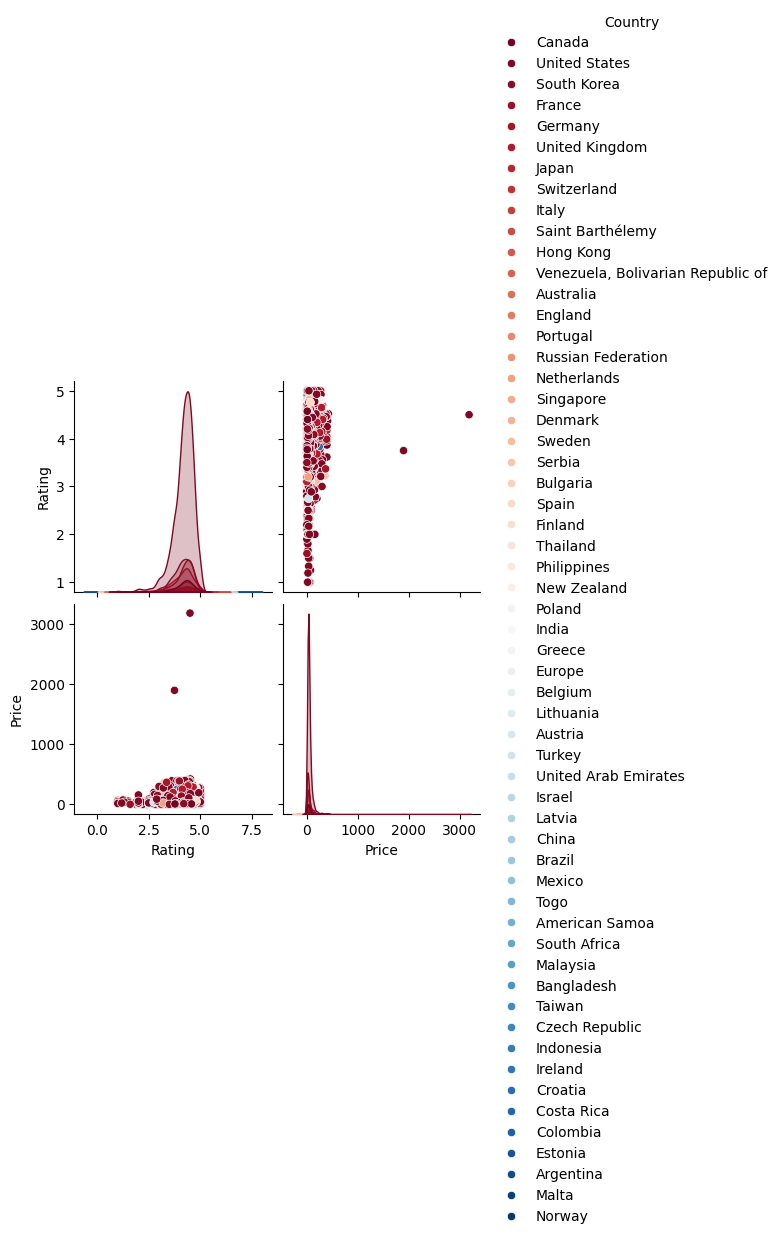

In [15]:
sns.pairplot(merged_df, hue ='Country', palette='RdBu')

In [16]:
#Dropped the null values in the Results column:
merged_df.dropna(subset=['Results'], inplace=True)
merged_df.shape

(5584, 8)

In [17]:
#This gives us the mean and other useful descriptions of the data, specifically the rating column
merged_df.describe()

,Rating,Price
count,5584.000000,5581.000000
mean,4.175367,45.527447
std,0.493009,61.393942
min,1.000000,0.000000
25%,3.954125,22.000000
50%,4.262100,34.000000
75%,4.503075,52.000000
max,5.000000,3185.860638


In [18]:
#We used this to check if there were any other null values in our data frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5584 entries, 0 to 19505
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        5584 non-null   object 
 1   Name         5584 non-null   object 
 2   Type         5580 non-null   object 
 3   Country      4932 non-null   object 
 4   Ingredients  5584 non-null   object 
 5   Results      5584 non-null   object 
 6   Rating       5584 non-null   float64
 7   Price        5581 non-null   float64
dtypes: float64(2), object(6)
memory usage: 392.6+ KB


In [19]:
#We dropped the null values in the Type column
merged_df["Type"].dropna()

0                      Toner
2           Facial Treatment
3              Face Cleanser
4              Face Cleanser
6                      Serum
                ...         
19498    General Moisturizer
19500                  Serum
19503      Night Moisturizer
19504       Facial Treatment
19505                Essence
Name: Type, Length: 5580, dtype: object

In [20]:
merged_df.loc[merged_df['Type'] == np.nan]

,Brand,Name,Type,Country,Ingredients,Results,Rating,Price


In [21]:
#Created a copy of our dataframe and removed the non-skincare related products
merged_df = merged_df[~merged_df['Type'].isin(["Face Makeup", "Eye Makeup", "Lip Makeup", "Makeup Applicator", "False Eyelash", "Cheek Makeup"])]

In [22]:
merged_df.shape

(4664, 8)

In [23]:
merged_df['Type'].value_counts()

Type
Serum                  586
General Moisturizer    544
Face Cleanser          411
Bath & Body            289
Other Haircare         274
Sunscreen              244
Eye Moisturizer        238
Toner                  200
Facial Treatment       193
Wet Mask               176
Shampoo                175
Exfoliator             166
Lip Moisturizer        161
Makeup Remover         141
Oil                    118
Fragrance              117
Conditioner            109
Night Moisturizer       75
Sheet Mask              74
Day Moisturizer         64
Overnight Mask          55
Hand Care               53
Essence                 51
Tanning                 42
Lip Mask                38
Eye Mask                28
Nail Care               25
Tool                     7
Emulsion                 6
Name: count, dtype: int64

In [24]:
merged_df['Type'].value_counts()
# merged_df['Brand'].value_counts()

Type
Serum                  586
General Moisturizer    544
Face Cleanser          411
Bath & Body            289
Other Haircare         274
Sunscreen              244
Eye Moisturizer        238
Toner                  200
Facial Treatment       193
Wet Mask               176
Shampoo                175
Exfoliator             166
Lip Moisturizer        161
Makeup Remover         141
Oil                    118
Fragrance              117
Conditioner            109
Night Moisturizer       75
Sheet Mask              74
Day Moisturizer         64
Overnight Mask          55
Hand Care               53
Essence                 51
Tanning                 42
Lip Mask                38
Eye Mask                28
Nail Care               25
Tool                     7
Emulsion                 6
Name: count, dtype: int64

In [25]:
#We noticed that there were some null values under Country, so we added an "Unknown" string instead so the data type would be consistent
merged_df["Country"].fillna("Unknown", inplace=True)
merged_df["Country"].value_counts()

<ipython-input-25-e33a0faa3fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Country"].fillna("Unknown", inplace=True)


Country
United States                        2288
South Korea                           527
Unknown                               400
France                                316
United Kingdom                        295
Canada                                127
Japan                                 126
Australia                              94
Germany                                78
Denmark                                43
England                                28
Spain                                  26
Netherlands                            24
Sweden                                 23
Greece                                 21
Switzerland                            21
Turkey                                 20
India                                  20
Italy                                  19
New Zealand                            19
Philippines                            13
Poland                                 12
Indonesia                              11
Malaysia                  

In [26]:
#We encoded the Type and the Country to generate more meaningful plots using the encoded data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['Type_label'] = le.fit_transform(merged_df['Type'])
merged_df['Country_label'] = le.fit_transform(merged_df['Country'])

<ipython-input-26-51ce82edd6b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Type_label'] = le.fit_transform(merged_df['Type'])
<ipython-input-26-51ce82edd6b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Country_label'] = le.fit_transform(merged_df['Country'])


In [27]:
df = merged_df
merged_df

,Brand,Name,Type,Country,Ingredients,Results,Rating,Price,Type_label,Country_label
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456,13.00,26,8
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000,0.00,9,8
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112,39.00,8,53
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000,8.06,8,44
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578,11.10,21,8
...,...,...,...,...,...,...,...,...,...,...
19498,Isntree,hyaluronic acid aqua gel cream,General Moisturizer,South Korea,"Water,Methylpropanediol,Coco-Caprylate,1,2-Hex...","Good For Oily Skin,Redness Reducing,Reduces Ir...",3.5000,3.10,11,44
19500,The Ordinary,caffeine solution 5 egcg,Serum,Canada,"Water,Caffeine,Maltodextrin,Glycerin,Propanedi...","Good For Oily Skin,Skin Texture,Reduces Large ...",3.7715,8.90,21,8
19503,CeraVe,pm facial moisturizing lotion,Night Moisturizer,Canada,"Water,Glycerin,Caprylic/Capric Triglyceride,Ni...","Good For Oily Skin,Redness Reducing,Anti-Aging...",4.4000,15.50,17,8
19504,The Ordinary,aha 30 bha 2 peeling solution,Facial Treatment,Canada,"Glycolic Acid,Water,Aloe Barbadensis Leaf Wate...","Good For Oily Skin,Reduces Irritation,Skin Tex...",4.5734,9.50,9,8


In [28]:
merged_df.loc[14576, "Price"] = 18 #14576py
merged_df.loc[merged_df["Brand"] == "Mad Hippie"]

,Brand,Name,Type,Country,Ingredients,Results,Rating,Price,Type_label,Country_label
11233,Mad Hippie,microdermabrasion facial,Exfoliator,United States,"Water,Disodium Cocoamphodiacetate,Bambusa Arun...","Good For Oily Skin,Reduces Irritation,Skin Tex...",3.1,17.298,5,53
14576,Mad Hippie,cleansing oil,Makeup Remover,United States,"Carthamus Tinctorius Seed Oil,Squalane,Rosa Ca...","Anti-Aging,Scar Healing,Brightening,Irritating",4.5,18.000,15,53


We generated pairplots, histplots, and countplots using rating, country and type:

In [ ]:
sns.pairplot(merged_df, hue ='Type', palette= 'RdBu', diag_kind='hist')

In [ ]:
sns.countplot(data=merged_df,x='Type_label', hue = 'Type_label')

In [ ]:
sns.countplot(data=merged_df,x='Country_label', hue = 'Country_label')

In [ ]:
# sns.countplot(data=merged_df,x='Rating', hue = 'Rating')

In [ ]:
sns.histplot(data=merged_df,x='Rating')

In [ ]:
sns.histplot(data=merged_df,x='Price')

#One Hot Encoding

##One Hot Encoding Brand

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'Brand' column
one_hot_encoded = encoder.fit_transform(merged_df[['Brand']]).toarray()

# Create a DataFrame from the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Brand']))

# Join the one-hot encoded columns back to the original DataFrame
merged_df = merged_df.join(one_hot_df)

# Drop the original 'Brand' column if no longer needed
merged_df.drop('Brand', axis=1, inplace=True)

# Display the updated DataFrame
merged_df.head()

##Encoding Results

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def str_to_list(x):
  return x.strip().split(',')

merged_df['Results'] = merged_df['Results'].dropna().apply(str_to_list)

mlb = MultiLabelBinarizer()

one_hot_encoded = mlb.fit_transform(merged_df['Results'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

merged_df = merged_df.join(one_hot_df)


In [ ]:
merged_df.head()

In [ ]:
merged_df.columns

##Encoding Ingredients

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def str_to_list(x):
  return x.strip().split(',')


merged_df['Ingredients'] = merged_df['Ingredients'].dropna().apply(str_to_list)


In [ ]:
mlb1 = MultiLabelBinarizer()

one_hot_encoded1 = mlb1.fit_transform(merged_df['Ingredients'])

one_hot_df1 = pd.DataFrame(one_hot_encoded1, columns=mlb1.classes_)

merged_df = merged_df.join(one_hot_df1)

In [ ]:
merged_df.head()

##One Hot Encoding Type

In [ ]:
# Initialize the OneHotEncoder
encoder_type = OneHotEncoder()

# Fit and transform the 'Type' column
one_hot_encoded_type = encoder_type.fit_transform(merged_df[['Type']]).toarray()

# Create a DataFrame from the one-hot encoded data
one_hot_df_type = pd.DataFrame(one_hot_encoded_type, columns=encoder_type.get_feature_names_out(['Type']))

# Join the one-hot encoded columns back to the original DataFrame
merged_df = merged_df.join(one_hot_df_type)

# Drop the original 'Brand' column if no longer needed
merged_df.drop('Type', axis=1, inplace=True)

# Display the updated DataFrame
merged_df.head()

In [ ]:
merged_df.head()

In [ ]:
# merged_df = merged_df.join(brand_encoded)
encoded = merged_df.drop(columns=["Country", "Ingredients", "Results", "Type_label", "Type_nan"]).dropna()
encoded.columns

In [ ]:
encoded.head()

#Training first model (Recommendation System)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns=["Name"]), merged_df['Name'], test_size=0.2, random_state=42)

In [ ]:
# mergeddd = merged_df.drop(columns=["Brand"])

In [ ]:

from sklearn.neighbors import NearestNeighbors

# Creating an instance of the NearestNeighbors class
recommender = NearestNeighbors(metric='cosine')

# Fitting the encoded genres to the recommender
# recommender.fit(brand_encoded.toarray())
recommender.fit(encoded.drop(columns=["Name"]))

# merged_df_copy.head()


In [ ]:
# Index of the product the user has previously watched
product_index = 0

# Number of recommendations to return
num_recommendations = 5

# Getting the recommendations
_, recommendations = recommender.kneighbors(encoded.drop(columns=["Name"]).iloc[[product_index]], n_neighbors=num_recommendations)

# Extracting the movie titles from the recommendations
recommended_products = merged_df.iloc[recommendations[0]]['Name']

# Printing the recommended movies
print("OG product:" +  merged_df.loc[product_index,"Name"] + "\nBrand:" + merged_df.loc[product_index,"Name"] )
print("Recommended Products:")
for product in recommended_products:
    print(product + "\nBrand:" + merged_df.loc[merged_df['Name'] == product, 'Name'].iloc[0])


In [ ]:
# Index of the product the user has previously watched
product_index = 0

# Number of recommendations to return
num_recommendations = 5

# Getting the recommendations
_, recommendations = recommender.kneighbors(encoded.drop(columns=["Name"]).iloc[[product_index]], n_neighbors=num_recommendations)

# Extracting the recommended products' indices
recommended_indices = recommendations[0]

# Printing the original product details
print("OG Product:")
print(merged_df.iloc[product_index])

# Printing the recommended products' details
print("\nRecommended Products:")
for index in recommended_indices:
    print(merged_df.iloc[index])
    print("\n")

# Collaboration Statement

We asked chatgpt how to create a similarity matrix to connect our two datasets together. Below is our exact prompt and code received with chatgpt:

how do i do similairty testing between tehdatasets to see if some of the products arethe same

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the datasets
products_df = pd.read_csv('/path/to/your/products.csv')
reviews_df = pd.read_csv('/path/to/your/reviews.csv')

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['Product'] = products_df['Product'].apply(preprocess_text)
reviews_df['Product'] = reviews_df['Product'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
combined_product_names = pd.concat([products_df['Product'], reviews_df['Product']])
tfidf_matrix = vectorizer.fit_transform(combined_product_names)
tfidf_products = tfidf_matrix[:len(products_df)]
tfidf_reviews = tfidf_matrix[len(products_df):]

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Match products based on similarity scores
best_match_indices = similarity_matrix.argmax(axis=1)
reviews_df['Matched_Product'] = products_df['Product'].iloc[best_match_indices].values

# Display the first few rows of the updated reviews_df
print("\nReviews DataFrame with Matched Products:")
print(reviews_df[['Product', 'Matched_Product']].head())

what i want to do is that i want my product to be the base and match my reviews to the products. I want them to be merged together based on the similiarity testing of the product name on reviews and have all the review columns (excluding product name) to be added onto the product

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Mock data for products_df
products_data = {
    'Category': ['Night Cream', 'Face Mist', 'Night Cream', 'Face Mist', 'Night Cream'],
    'Merk': ['Hada Labo', 'PIXY', 'Wardah', 'Avene', 'Wardah'],
    'Product': ['Perfect 3D Gel', 'Aqua Beauty Protecting Mist', 'Lightening Night Cream', 'Thermal Spring Water', 'White Secret Night Cream'],
    'Price': ['Rp. 91.000', 'Rp. 27.000', 'Rp. 0', 'Rp. 199.000', 'Rp. 98.000'],
    'OverallRating': [3.8, 4.2, 3.5, 4.4, 3.6],
    'Reviewer': [978.0, 3851.0, 806.0, 1239.0, 572.0]
}

# Mock data for reviews_df
reviews_data = {
    'Product': ['Aqua Beauty Protecting Mist', 'White Secret Night Cream', 'Lightening Night Cream', 'Perfect 3D Gel', 'Thermal Spring Water'],
    'Review': ['Great mist!', 'Works well.', 'Good result.', 'Very effective.', 'Refreshing!']
}

# Create DataFrames
products_df = pd.DataFrame(products_data)
reviews_df = pd.DataFrame(reviews_data)

print("Products DataFrame:")
print(products_df)

print("\nReviews DataFrame:")
print(reviews_df)

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['Product'] = products_df['Product'].apply(preprocess_text)
reviews_df['Product'] = reviews_df['Product'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
combined_product_names = pd.concat([products_df['Product'], reviews_df['Product']])
tfidf_matrix = vectorizer.fit_transform(combined_product_names)
tfidf_products = tfidf_matrix[:len(products_df)]
tfidf_reviews = tfidf_matrix[len(products_df):]

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Match products based on similarity scores
best_match_indices = similarity_matrix.argmax(axis=1)
reviews_df['Matched_Product'] = products_df['Product'].iloc[best_match_indices].values

# Merge the reviews into the products DataFrame based on the best matches
merged_df = products_df.merge(reviews_df.drop(columns='Product'), left_on='Product', right_on='Matched_Product', how='left')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)

## Milestone 3 Model (Updated)

##Linear Regression on Price

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = sephora
df.columns

In [ ]:
df.head()

In [ ]:
df_final = df[["name","loves_count", "brand_id", "out_of_stock", "rating", "primary_category","Price", 'reviews', 'online_only', 'new', 'child_count']]
df_final.head()

In [ ]:
encoder_type = OneHotEncoder()

# Fit and transform the 'Type' column
one_hot_encoded_type = encoder_type.fit_transform(df_final[['primary_category']]).toarray()

# Create a DataFrame from the one-hot encoded data
one_hot_df_type = pd.DataFrame(one_hot_encoded_type, columns=encoder_type.get_feature_names_out(['primary_category']))

# Join the one-hot encoded columns back to the original DataFrame
df_final= df_final.join(one_hot_df_type)

# Drop the original 'Brand' column if no longer needed
df_final.drop('primary_category', axis=1, inplace=True)

# Display the updated DataFrame
df_final.head()

In [ ]:
df_final.set_index("name", inplace=True)
df_final

In [ ]:
df_final.columns

In [ ]:
df_final.dropna(inplace=True)

In [ ]:
X = df_final.drop(columns=['Price'])
X = X.drop(columns = X.columns[:2])
y = df_final['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [ ]:
reg.coef_

In [ ]:
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)

In [ ]:
display(min(yhat_train))
display(max(yhat_train))

In [ ]:
sns.scatterplot(x = list(range(0,len(regmodel.coef_))), y = regmodel.coef_)

x = list(range(0,len(regmodel.coef_)))

plt.plot(x, regmodel.coef_, color = 'm')

In [ ]:
print('\nMean squared error: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nMean squared error: %.2f' % mean_squared_error(y_test, yhat_test))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib.pyplot as plt
import operator as operater

print(X.shape)
print(y.shape)

# Extract the first column of X for scattering
X_scatter = X.iloc[:, 0]  # Assuming you want to plot against the first feature

plt.scatter(X_scatter, y, s=10)

sort_axis = operater.itemgetter(0)
# Use X_scatter for sorting as well
sorted_zip = sorted(zip(X_scatter, y_train), key=sort_axis)
X_train, y_train = zip(*sorted_zip)
plt.plot(X_train, y_train, color='m')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import operator as operater

print(X.shape)
print(y.shape)
plt.scatter(X_scatter, y, s=10)

sort_axis = operater.itemgetter(0)
sorted_zip = sorted(zip(X, y_train), key=sort_axis)
X_train, y_train = zip(*sorted_zip)
plt.plot(X_train, y_train, color='m')
plt.show

In [ ]:
merged_df.head()

##Linear Regression on Rating

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = sephora
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(subset=["rating"],inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
X = data[["brand_id", "loves_count","out_of_stock", "new", "online_only","limited_edition"]]

y = data["rating"]
X

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer

# def str_to_list(x):
#   return x.strip().split(',')
# X['ingredients'] = X['ingredients'].dropna().apply(str_to_list)

In [ ]:

# mlb = MultiLabelBinarizer()

# one_hot_encoded = mlb.fit_transform(X['ingredients'])

# one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# X = X.join(one_hot_df)

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [ ]:
reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [ ]:
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, yhat_test)
print("MSE test:",mse)
mse_train = mean_squared_error(y_train, yhat_train)
print("MSE train:",mse_train)

In [ ]:
sns.heatmap(data[["brand_id", "loves_count","out_of_stock", "new", "online_only","rating"]].corr(), annot = True, vmin=-1, vmax=1, center=0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = list(range(0,len(regmodel.coef_))), y = regmodel.coef_)
x = list(range(0,len(regmodel.coef_)))
plt.plot(x, regmodel.coef_, color = 'm')

In [ ]:
# import matplotlib.pyplot as plt
# import operator as operater
# print(X.shape)
# print(y.shape)
# # Extract the first column of X for scattering
# X_scatter = X.iloc[:, 0]  # Assuming you want to plot against the first feature
# plt.scatter(X_scatter, y, s=10)
# sort_axis = operater.itemgetter(0)
# # Use X_scatter for sorting as well
# sorted_zip = sorted(zip(X_scatter, y_train), key=sort_axis)
# X_train, y_train = zip(*sorted_zip)
# plt.plot(X_train, y_train, color='m')
# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, alpha=0.7)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
print('Polynomial Features: [1,x,x**2]')
print(x_poly[0])

In [ ]:
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [ ]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)